In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import warnings
%matplotlib inline
np.set_printoptions(precision=3, linewidth=80, edgeitems=1) # make numpy less verbose
xr.set_options(display_width=70)
warnings.simplefilter('ignore') 

In [2]:
ds = xr.tutorial.load_dataset('air_temperature')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 ... 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

In [4]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 

In [5]:
ds.dims

Frozen(SortedKeysDict({'lat': 25, 'time': 2920, 'lon': 53}))

In [6]:
ds.attrs

OrderedDict([('Conventions', 'COARDS'),
             ('title', '4x daily NMC reanalysis (1948)'),
             ('description',
              'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'),
             ('platform', 'Model'),
             ('references',
              'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html')])

In [7]:
ds.air.values

array([[[241.2 , ..., 238.6 ],
        ...,
        [296.29, ..., 296.6 ]],

       ...,

       [[245.09, ..., 241.79],
        ...,
        [297.69, ..., 295.69]]], dtype=float32)

In [8]:
type(ds.air.values)

numpy.ndarray

In [9]:
ds.air.dims

('time', 'lat', 'lon')

In [10]:
ds.air.attrs

OrderedDict([('long_name', '4xDaily Air temperature at sigma level 995'),
             ('units', 'degK'),
             ('precision', 2),
             ('GRIB_id', 11),
             ('GRIB_name', 'TMP'),
             ('var_desc', 'Air temperature'),
             ('dataset', 'NMC Reanalysis'),
             ('level_desc', 'Surface'),
             ('statistic', 'Individual Obs'),
             ('parent_stat', 'Other'),
             ('actual_range', array([185.16, 322.1 ], dtype=float32))])

In [11]:
ds.air.attrs['actual_range']

array([185.16, 322.1 ], dtype=float32)

In [12]:
ds.air.attrs['parent_stat']

'Other'

In [13]:
ds.air.attrs['tutorial-date'] = 27042017

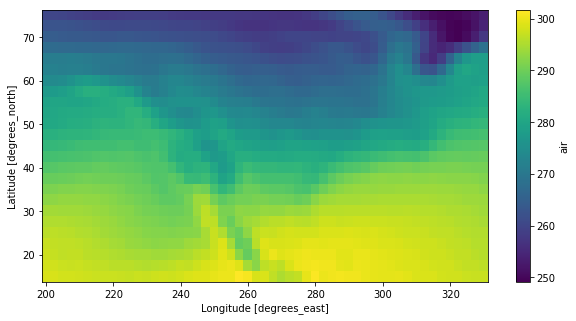

In [14]:
kelvin = ds.air.mean(dim='time')
plt.figure(figsize=(10,5))
kelvin.plot();

In [15]:
type(kelvin)

xarray.core.dataarray.DataArray

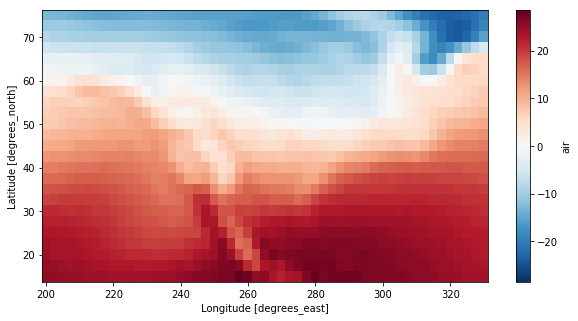

In [16]:
centigrade = kelvin - 273.16
plt.figure(figsize=(10,5))
centigrade.plot();

In [17]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 ... 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

In [18]:
ds['centigrade'] = centigrade
ds['kelvin'] = kelvin
ds


<xarray.Dataset>
Dimensions:     (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat         (lat) float32 75.0 72.5 70.0 67.5 ... 20.0 17.5 15.0
  * lon         (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time        (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air         (time, lat, lon) float32 241.2 242.5 ... 296.19 295.69
    centigrade  (lat, lon) float32 -12.784363 -12.977417 ... 24.14502
    kelvin      (lat, lon) float32 260.37564 260.1826 ... 297.30502
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

In [19]:
ds.kelvin.attrs # attrs are empty! Let's add some

OrderedDict()

In [20]:
ds.kelvin.attrs['Description'] = 'Mean air tempterature (through time) in kelvins'

In [21]:
ds.kelvin

<xarray.DataArray 'kelvin' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733,
        253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 ,
        254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247,
        257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793,
        295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686,
        296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104,
        297.30502]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
Attributes:
    Description:  Mean air tempterature (through time) in kelvins

In [22]:
df = ds.to_dataframe()
df.head()

air  centigrade      kelvin
lat  lon   time                                                   
75.0 200.0 2013-01-01 00:00:00  241.199997  -12.784363  260.375641
           2013-01-01 06:00:00  242.099991  -12.784363  260.375641
           2013-01-01 12:00:00  242.299988  -12.784363  260.375641
           2013-01-01 18:00:00  241.889999  -12.784363  260.375641
           2013-01-02 00:00:00  243.199997  -12.784363  260.375641

In [23]:
df.describe()

,air,centigrade,kelvin
count,3.869000e+06,3.869000e+06,3.869000e+06
mean,2.870343e+02,8.084237e+00,2.874956e+02
std,1.727649e+01,1.357308e+01,1.488547e+01
min,2.210000e+02,-2.405811e+01,2.491019e+02
25%,2.722000e+02,-3.318237e+00,2.698418e+02
50%,2.852000e+02,9.612549e+00,2.827726e+02
75%,2.946000e+02,2.057056e+01,2.937306e+02
max,3.174000e+02,2.848599e+01,3.016460e+02


In [24]:
netcdf_file = ds.to_netcdf('netcdf_file.nc')

In [25]:
csv_file = df.to_csv('csv_file.csv')

In [26]:
ds.air[:, 1, 2]

<xarray.DataArray 'air' (time: 2920)>
array([244.7    , 244.2    , 244.     , ..., 248.59   , 248.48999,
       248.39   ], dtype=float32)
Coordinates:
    lat      float32 72.5
    lon      float32 205.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NMC Reanalysis
    level_desc:     Surface
    statistic:      Individual Obs
    parent_stat:    Other
    actual_range:   [185.16 322.1 ]
    tutorial-date:  27042017

In [27]:
ds.air[:1,1,2][:3]

<xarray.DataArray 'air' (time: 1)>
array([244.7], dtype=float32)
Coordinates:
    lat      float32 72.5
    lon      float32 205.0
  * time     (time) datetime64[ns] 2013-01-01
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NMC Reanalysis
    level_desc:     Surface
    statistic:      Individual Obs
    parent_stat:    Other
    actual_range:   [185.16 322.1 ]
    tutorial-date:  27042017

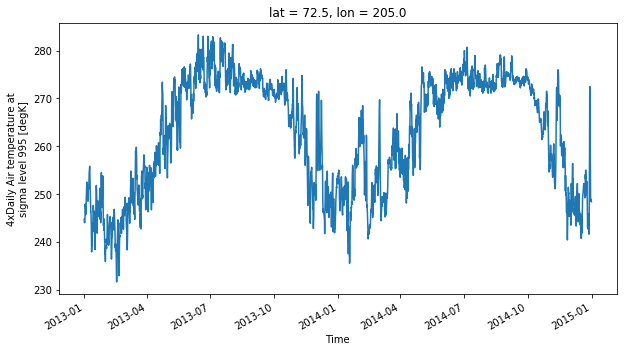

In [28]:
plt.figure(figsize=(10,5))
ds.air[:, 1, 2].plot()

In [29]:
ds.air[ds.air['time']==0]

<xarray.DataArray 'air' (time: 0, lat: 25, lon: 53)>
array([], shape=(0, 25, 53), dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NMC Reanalysis
    level_desc:     Surface
    statistic:      Individual Obs
    parent_stat:    Other
    actual_range:   [185.16 322.1 ]
    tutorial-date:  27042017

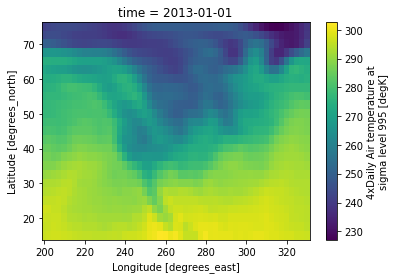

In [30]:
ds.air.isel(time=0).plot();

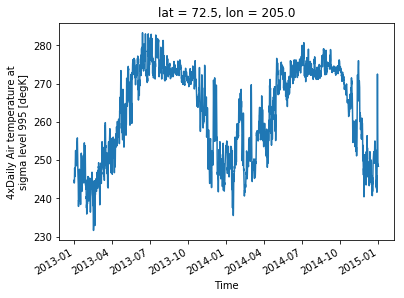

In [31]:
ds.air.sel(lat=72.5, lon=205).plot();

(array([  1397.,  33695.,  92256., 109564., 147856., 306424., 374620., 546199.,
        320411.,   2078.]),
 array([221.   , 230.479, 239.958, 249.437, 258.916, 268.395, 277.874, 287.353,
        296.832, 306.311, 315.79 ], dtype=float32),
 <a list of 10 Patch objects>)

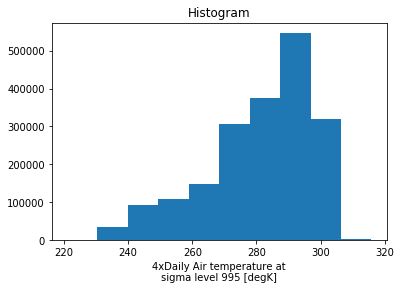

In [32]:
ds.air.sel(time='2013').plot()

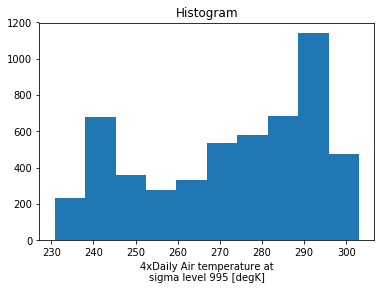

In [33]:
ds.air.sel(time='2013-02-02').plot();

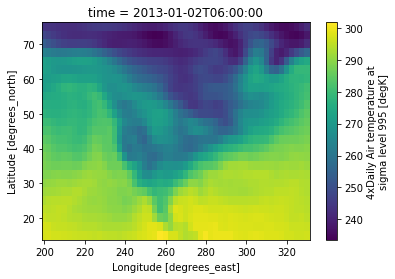

In [34]:
ds.air.sel(time='2013-01-02T06:00').plot();

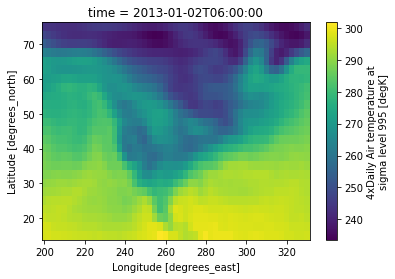

In [35]:
ds.air.sel(time='2013-01-02T06:00').plot();

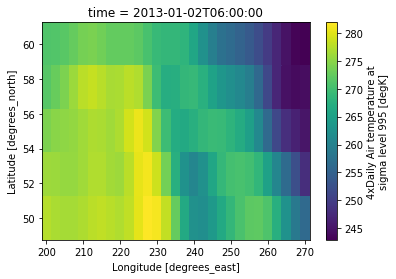

In [36]:
ds.air.sel(lat=slice(60, 50), lon=slice(200, 270), time='2013-01-02T06:00:00').plot()

In [37]:
a = xr.DataArray(np.arange(3),dims='time',coords ={'time':np.arange(3)})
a,type(a)

(<xarray.DataArray (time: 3)>
 array([0, 1, 2])
 Coordinates:
   * time     (time) int32 0 1 2, xarray.core.dataarray.DataArray)

In [38]:
a = np.array(a)
a, type(a)

(array([0, 1, 2]), numpy.ndarray)

In [39]:
b = xr.DataArray(np.arange(4),dims='space',coords ={'space':np.arange(4)})
b,type(b)

(<xarray.DataArray (space: 4)>
 array([0, 1, 2, 3])
 Coordinates:
   * space    (space) int32 0 1 2 3, xarray.core.dataarray.DataArray)

In [40]:
atime = np.arange(3)
btime = np.arange(4)+1
atime,btime

(array([0, 1, 2]), array([1, 2, 3, 4]))

In [41]:
aa  = xr.DataArray(np.arange(3),dims='time',coords={'time': atime})
bb  = xr.DataArray(np.arange(4),dims='time',coords={'time': btime})

In [42]:
aa,bb

(<xarray.DataArray (time: 3)>
 array([0, 1, 2])
 Coordinates:
   * time     (time) int32 0 1 2, <xarray.DataArray (time: 4)>
 array([0, 1, 2, 3])
 Coordinates:
   * time     (time) int32 1 2 3 4)

In [43]:
ds.max()

<xarray.Dataset>
Dimensions:     ()
Data variables:
    air         float64 317.4
    centigrade  float64 28.49
    kelvin      float64 301.6

In [44]:
ds.description

'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'

In [45]:
ds.min()

<xarray.Dataset>
Dimensions:     ()
Data variables:
    air         float64 221.0
    centigrade  float64 -24.06
    kelvin      float64 249.1

In [46]:
ds.mean()

<xarray.Dataset>
Dimensions:     ()
Data variables:
    air         float32 281.25513
    centigrade  float32 8.094596
    kelvin      float32 281.2546

In [47]:
ds.all

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:     (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat         (lat) float32 75.0 72.5 70.0 67.5 ... 20.0 17.5 15.0
  * lon         (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time        (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air         (time, lat, lon) float32 241.2 242.5 ... 296.19 295.69
    centigrade  (lat, lon) float32 -12.784363 -12.977417 ... 24.14502
    kelvin      (lat, lon) float32 260.37564 260.1826 ... 297.30502
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...>

In [48]:
ds.data_vars

Data variables:
    air         (time, lat, lon) float32 241.2 242.5 ... 296.19 295.69
    centigrade  (lat, lon) float32 -12.784363 -12.977417 ... 24.14502
    kelvin      (lat, lon) float32 260.37564 260.1826 ... 297.30502

In [49]:
ds.variables

Frozen(OrderedDict([('lat', <xarray.IndexVariable 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5,
       50. , 47.5, 45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5,
       25. , 22.5, 20. , 17.5, 15. ], dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y), ('air', <xarray.Variable (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999,

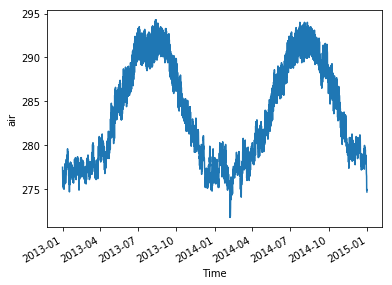

In [50]:
ds.air.median(dim=['lat', 'lon']).plot();

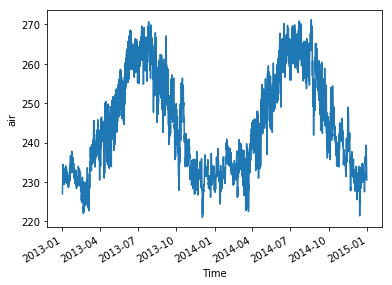

In [51]:
ds.air.min(dim=['lat', 'lon']).plot();

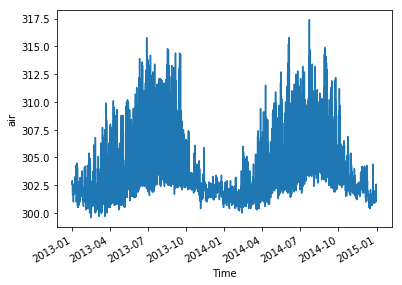

In [52]:
ds.air.max(dim=['lat', 'lon']).plot();

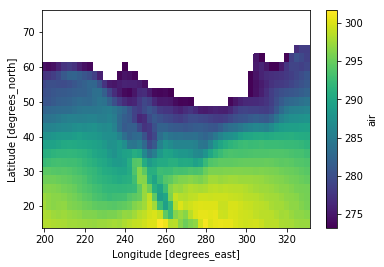

In [53]:
means = ds.air.mean(dim=['time'])
means.where(means > 273.15).plot();

In [54]:
ds.air.groupby('time.season').mean()

<xarray.DataArray 'air' (season: 4)>
array([273.64966, 289.20493, 278.99133, 283.02805], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [55]:
ds.air.groupby('time.month').mean('time')

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
array([[[246.34987, 246.38608, ..., 244.08795, 245.6467 ],
        [248.8576 , 248.90733, ..., 243.50865, 246.75471],
        ...,
        [296.5446 , 296.46982, ..., 295.0812 , 294.53006],
        [297.15417, 297.2383 , ..., 295.77554, 295.63647]],

       [[246.67715, 246.40576, ..., 243.0021 , 244.44383],
        [247.8001 , 247.75992, ..., 242.26633, 245.06662],
        ...,
        [296.78754, 296.63443, ..., 294.2178 , 293.70258],
        [297.2889 , 297.2165 , ..., 294.9558 , 294.87967]],

       ...,

       [[253.74484, 253.64487, ..., 243.9345 , 245.14209],
        [259.12967, 258.62927, ..., 243.07965, 245.46625],
        ...,
        [298.58783, 298.42026, ..., 298.19397, 297.9083 ],
        [298.81143, 298.8566 , ..., 298.7519 , 298.8189 ]],

       [[247.971  , 248.02118, ..., 241.02383, 242.62823],
        [249.73361, 250.16037, ..., 240.96469, 244.11626],
        ...,
        [297.46814, 297.38025, ..., 296.84668, 2

In [56]:
clim = ds.air.groupby('time.month').mean('time')

In [57]:
clim

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
array([[[246.34987, 246.38608, ..., 244.08795, 245.6467 ],
        [248.8576 , 248.90733, ..., 243.50865, 246.75471],
        ...,
        [296.5446 , 296.46982, ..., 295.0812 , 294.53006],
        [297.15417, 297.2383 , ..., 295.77554, 295.63647]],

       [[246.67715, 246.40576, ..., 243.0021 , 244.44383],
        [247.8001 , 247.75992, ..., 242.26633, 245.06662],
        ...,
        [296.78754, 296.63443, ..., 294.2178 , 293.70258],
        [297.2889 , 297.2165 , ..., 294.9558 , 294.87967]],

       ...,

       [[253.74484, 253.64487, ..., 243.9345 , 245.14209],
        [259.12967, 258.62927, ..., 243.07965, 245.46625],
        ...,
        [298.58783, 298.42026, ..., 298.19397, 297.9083 ],
        [298.81143, 298.8566 , ..., 298.7519 , 298.8189 ]],

       [[247.971  , 248.02118, ..., 241.02383, 242.62823],
        [249.73361, 250.16037, ..., 240.96469, 244.11626],
        ...,
        [297.46814, 297.38025, ..., 296.84668, 2

In [58]:
anomalies = ds.air.groupby('time.month') - clim

In [59]:
anomalies

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ -5.149872,  -3.886078, ...,  -8.587952,  -7.046707],
        [ -5.057617,  -4.407333, ...,  -8.208664,  -7.454727],
        ...,
        [ -0.644592,  -0.269836, ...,   0.818787,   0.669922],
        [ -0.864166,  -0.448303, ...,   1.014465,   0.963531]],

       [[ -4.249878,  -3.686081, ..., -10.487961,  -9.84671 ],
        [ -5.257614,  -4.807343, ..., -11.008652, -11.054718],
        ...,
        [ -0.344604,   0.230164, ...,   0.418793,   0.569946],
        [ -0.864166,  -0.03833 , ...,   0.624451,   0.963531]],

       ...,

       [[ -2.181   ,  -3.231186, ...,   2.966156,   2.161758],
        [  0.156387,  -0.870377, ...,   1.525299,   0.173737],
        ...,
        [ -1.178131,  -0.190247, ...,  -1.756683,  -2.131348],
        [ -0.090881,   0.403198, ...,  -2.0755  ,  -2.347626]],

       [[ -2.880997,  -3.731186, ...,   0.466156,  -0.838242],
        [  0.156387,  -0.870377, ...,  -0.674698,  -2.42627 ],
    

(array([8.400e+01, 9.000e+02, 1.146e+04, 9.762e+04, 5.205e+05, 2.677e+06,
        4.679e+05, 8.460e+04, 8.757e+03, 4.490e+02]),
 array([-33.741, -27.573, -21.406, -15.239,  -9.072,  -2.905,   3.263,   9.43 ,
         15.597,  21.764,  27.931], dtype=float32),
 <a list of 10 Patch objects>)

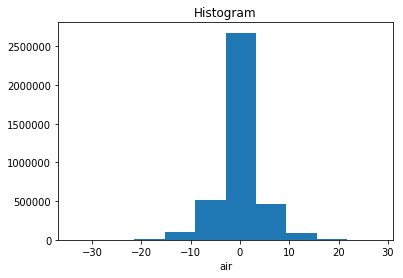

In [60]:
anomalies.plot()

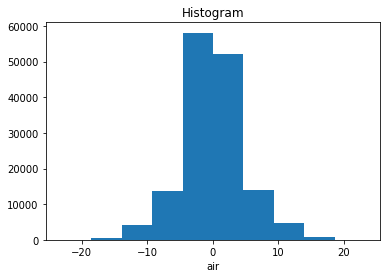

In [61]:
anomalies.sel(time= '2013-02').plot();

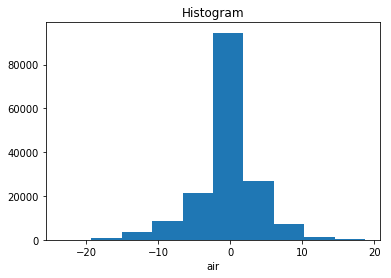

In [62]:
anomalies.sel(time= '2013-05').plot();

In [63]:
tmin = ds.air.resample(time = '1D').mean()#to one day '1D
# tmax = ds.air.resample('1D', dim='time', how='max')
tmax = ds.air.resample(time = '1D').max()

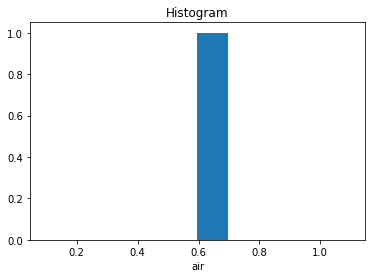

In [64]:
(tmin.sel(time='2013-02-15') - 273.15).plot();

In [65]:
ds_extremes = xr.Dataset({'tmin': tmin, 'tmax': tmax})

In [66]:
ds_extremes

<xarray.Dataset>
Dimensions:  (time: 730)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31
Data variables:
    tmin     (time) float32 273.63928 273.04547 ... 274.0441 273.34412
    tmax     (time) float64 302.9 302.1 302.5 ... 301.8 302.5 302.6

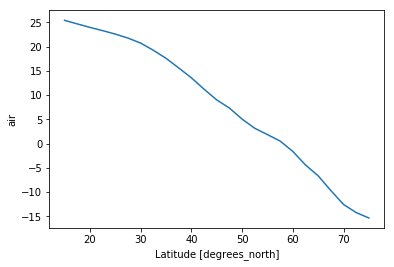

In [67]:
zonal_t_average = ds.air.mean(dim=['lon', 'time']) - 273.15
zonal_t_average.plot(); # 1D arrays are plotted as line plots

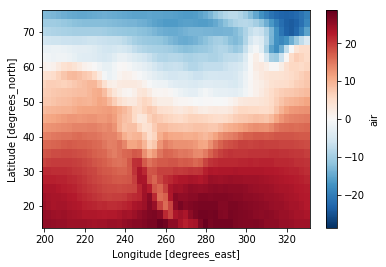

In [68]:
t_average = ds.air.mean(dim='time') - 273
t_average.plot()

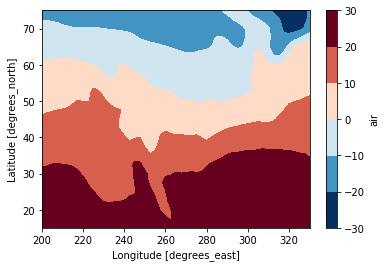

In [69]:
t_average.plot.contourf();

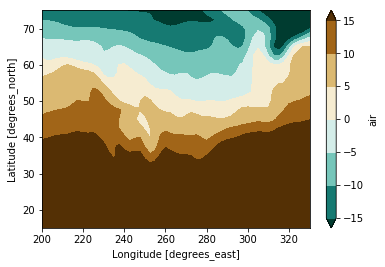

In [70]:
t_average.plot.contourf(cmap='BrBG_r', vmin=-15, vmax=15);

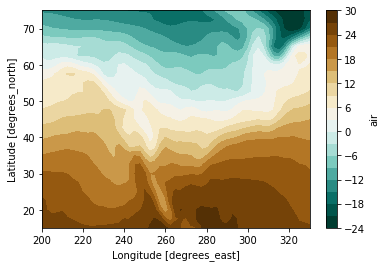

In [71]:
t_average.plot.contourf(cmap='BrBG_r', levels=22, center=False);

In [72]:
air_outliers = ds.air.isel(time=0).copy()

In [73]:
air_outliers

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
        238.59999],
       [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
        239.29999],
       [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
        241.7    ],
       ...,
       [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
        294.69998],
       [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
        295.19998],
       [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
        296.6    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    d

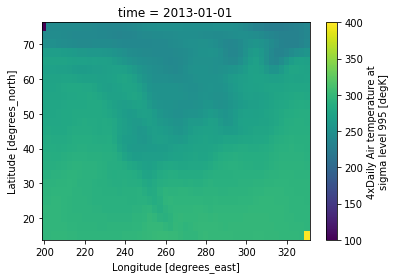

In [74]:
air_outliers[0,0] = 100
air_outliers[-1,-1] = 400
air_outliers.plot()


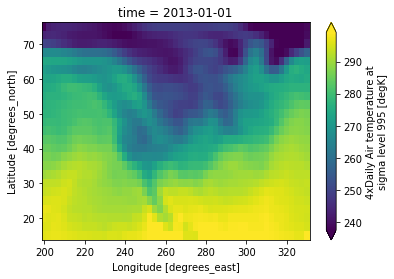

In [75]:
air_outliers.plot(robust=True);


In [76]:
t_season = ds.air.groupby('time.season').mean(dim='time')

In [77]:
t_season

<xarray.DataArray 'air' (season: 4, lat: 25, lon: 53)>
array([[[247.01007, 246.95503, ..., 242.69449, 244.23262],
        [248.83022, 248.98196, ..., 242.24562, 245.32053],
        ...,
        [296.939  , 296.83542, ..., 295.42157, 294.959  ],
        [297.4473 , 297.49   , ..., 296.13766, 296.05698]],

       [[273.39032, 273.2029 , ..., 266.19952, 267.94702],
        [274.33145, 274.48965, ..., 265.93015, 268.56693],
        ...,
        [298.91702, 298.57843, ..., 297.43808, 297.17545],
        [298.90414, 298.88306, ..., 297.87   , 297.96603]],

       [[258.86465, 258.69296, ..., 249.09572, 250.37955],
        [260.2769 , 260.37476, ..., 249.08131, 251.56924],
        ...,
        [297.43817, 297.3017 , ..., 295.31448, 294.91473],
        [297.8931 , 297.9006 , ..., 295.74725, 295.72275]],

       [[261.96924, 261.61057, ..., 249.53653, 250.96701],
        [267.2477 , 267.07742, ..., 248.85371, 251.75676],
        ...,
        [299.2114 , 299.02353, ..., 298.93045, 298.72104],
  

In [78]:
t_season-273.15

<xarray.DataArray 'air' (season: 4, lat: 25, lon: 53)>
array([[[-26.139923, -26.194962, ..., -30.455505, -28.917374],
        [-24.319778, -24.16803 , ..., -30.904373, -27.829468],
        ...,
        [ 23.789001,  23.685425, ...,  22.271576,  21.809021],
        [ 24.297302,  24.339996, ...,  22.98767 ,  22.906982]],

       [[  0.240326,   0.052917, ...,  -6.95047 ,  -5.202972],
        [  1.181458,   1.339661, ...,  -7.219849,  -4.583069],
        ...,
        [ 25.767029,  25.428436, ...,  24.288086,  24.025452],
        [ 25.75415 ,  25.733063, ...,  24.720001,  24.81604 ]],

       [[-14.285339, -14.457031, ..., -24.054276, -22.770447],
        [-12.873108, -12.775238, ..., -24.06868 , -21.58075 ],
        ...,
        [ 24.288177,  24.151703, ...,  22.16449 ,  21.76474 ],
        [ 24.743103,  24.75061 , ...,  22.59726 ,  22.572754]],

       [[-11.180756, -11.539429, ..., -23.613464, -22.182983],
        [ -5.902283,  -6.072571, ..., -24.29628 , -21.393234],
        ...,
     

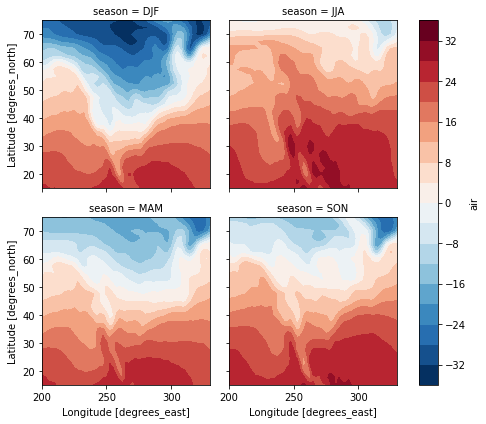

In [79]:
t_season=t_season-273.15
t_season.plot.contourf(x='lon',y='lat',col='season',col_wrap = 2 ,levels=22)

In [80]:
import cartopy.crs as ccrs

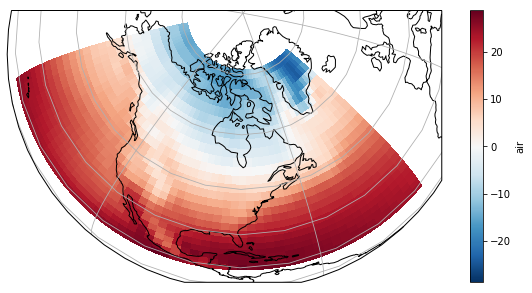

In [81]:

f = plt.figure(figsize=(10,5))
ax = plt.axes(projection = ccrs.Orthographic(-80,80))
t_average.plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines();ax.gridlines();

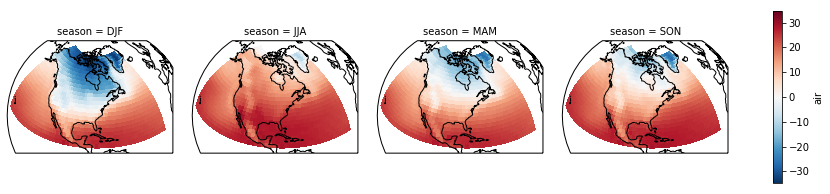

In [82]:
p = t_season.plot(x='lon', y='lat', col='season', transform=ccrs.PlateCarree(),
subplot_kws={'projection': ccrs.Orthographic(-80, 35)})
for ax in p.axes.flat:
    ax.coastlines()

In [83]:
from glob import glob

In [84]:
files = glob('air.*.nc')


In [85]:
files

['air.departure.sig995.2012.nc', 'air.sig995.2012.nc']

In [86]:
runoff = xr.open_mfdataset(files)


In [87]:
runoff

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 366)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2012-01-01 ... 2012-12-31
Data variables:
    air_dep  (time, lat, lon) float64 dask.array<shape=(366, 73, 144), chunksize=(366, 73, 144)>
    air      (time, lat, lon) float32 dask.array<shape=(366, 73, 144), chunksize=(366, 73, 144)>
Attributes:
    description:  The departure of the NCEP/NCAR Reanalysis air tem...

In [88]:
runoff.time

<xarray.DataArray 'time' (time: 366)>
array(['2012-01-01T00:00:00.000000000',
       '2012-01-02T00:00:00.000000000',
       '2012-01-03T00:00:00.000000000', ...,
       '2012-12-29T00:00:00.000000000',
       '2012-12-30T00:00:00.000000000',
       '2012-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 ... 2012-12-31
Attributes:
    long_name:      Time
    actual_range:   [17628096. 17636856.]
    delta_t:        0000-00-01 00:00:00
    standard_name:  time
    axis:           T
    avg_period:     0000-00-01 00:00:00

In [89]:
runoff.nbytes/1e9

0.0461725

In [90]:
runoff = runoff.chunk({'lat':60})
runoff.chunks

Frozen(SortedKeysDict({'time': (366,), 'lat': (60, 13), 'lon': (144,)}))

In [91]:
import dask
from multiprocessing.pool import ThreadPool

In [92]:
dask.config.set(pool=ThreadPool(1))

In [93]:
%time ro_seasonal = runoff.groupby('time.season').mean('time')

Wall time: 73.5 ms


In [94]:
%time ro_seasonal.compute()

Wall time: 403 ms


<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, season: 4)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air_dep  (season, lat, lon) float64 -55.95 -55.95 ... -70.42
    air      (season, lat, lon) float32 245.67015 ... 231.07713

In [95]:
dask.config.set(pool=ThreadPool(4))

In [96]:
%time ro_seasonal = runoff.groupby('time.season').mean('time')

Wall time: 18.9 ms


In [97]:
%time result = ro_seasonal.compute()

Wall time: 95.3 ms
